In [96]:
import numpy as np
import pandas as pd

In [97]:
data = pd.read_csv('innovize_final_ml.csv')

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         5997 non-null   float64
 1   diet_pref           5996 non-null   object 
 2   act_level           5994 non-null   object 
 3   sleep_hrs           6000 non-null   int64  
 4   mindfulness         6000 non-null   int64  
 5   career              5996 non-null   object 
 6   gender              5999 non-null   float64
 7   daily_avg_steps     5989 non-null   float64
 8   daily_avg_calories  5986 non-null   float64
 9   is_healthy          6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


(None,
    phy_fitness    diet_pref       act_level  sleep_hrs  mindfulness  \
 0          3.0        Vegan       Sedentary          7           10   
 1          4.0        Vegan  Lightly Active          7            1   
 2          8.0   Vegetarian          Active          8           10   
 3          2.0  Pescatarian       Sedentary          8            7   
 4          9.0  Pescatarian   Highly Active          5            7   
 
        career  gender  daily_avg_steps  daily_avg_calories  is_healthy  
 0      Artist     1.0           2020.0              1831.0           0  
 1     Teacher     0.0           5154.0              2190.0           0  
 2  Freelancer     1.0          12363.0              2297.0           1  
 3      Doctor     0.0           1664.0              1943.0           0  
 4    Business     0.0          17680.0              3527.0           1  )

In [98]:
data.isnull().sum()

phy_fitness            3
diet_pref              4
act_level              6
sleep_hrs              0
mindfulness            0
career                 4
gender                 1
daily_avg_steps       11
daily_avg_calories    14
is_healthy             0
dtype: int64

In [99]:
# Handling missing values

# For numerical columns, fill missing values with the median
num_cols = ["phy_fitness", "gender", "daily_avg_steps", "daily_avg_calories"]
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
data.isnull().sum()
# For categorical columns, fill missing values with the mode (most frequent value)
cat_cols = ["diet_pref", "act_level", "career"]
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Confirm that there are no missing values left
missing_values = data.isnull().sum()
missing_values

phy_fitness           0
diet_pref             0
act_level             0
sleep_hrs             0
mindfulness           0
career                0
gender                0
daily_avg_steps       0
daily_avg_calories    0
is_healthy            0
dtype: int64

In [100]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=["diet_pref", "act_level", "career"], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,phy_fitness,sleep_hrs,mindfulness,gender,daily_avg_steps,daily_avg_calories,is_healthy,diet_pref_Non-Vegetarian,diet_pref_Pescatarian,diet_pref_Vegan,...,act_level_Sedentary,career_Business,career_Doctor,career_Engineer,career_Freelancer,career_Lawyer,career_Manager,career_Nurse,career_Scientist,career_Teacher
0,3.0,7,10,1.0,2020.0,1831.0,0,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,4.0,7,1,0.0,5154.0,2190.0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,8.0,8,10,1.0,12363.0,2297.0,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2.0,8,7,0.0,1664.0,1943.0,0,False,True,False,...,True,False,True,False,False,False,False,False,False,False
4,9.0,5,7,0.0,17680.0,3527.0,1,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = data_encoded.drop(columns=["is_healthy"])
y = data_encoded["is_healthy"]

# Save feature names
feature_names = X.columns.tolist()

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9675

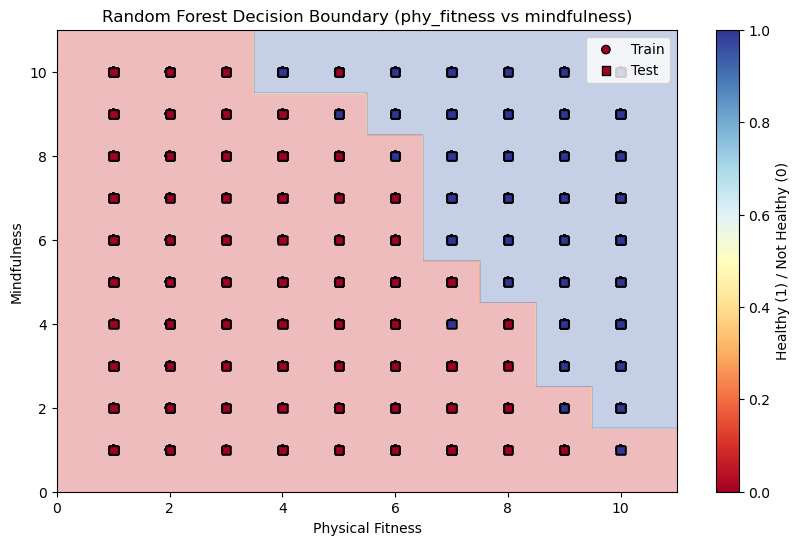

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Train a new Random Forest model using only 'phy_fitness' and 'mindfulness'
X_vis_train = X_train[["phy_fitness", "mindfulness"]]
X_vis_test = X_test[["phy_fitness", "mindfulness"]]

rf_vis_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_vis_model.fit(X_vis_train, y_train)

# Predict on the grid points for decision boundary visualization
Z = rf_vis_model.predict(grid_df)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_vis_train["phy_fitness"], X_vis_train["mindfulness"], c=y_train, cmap=plt.cm.RdYlBu, edgecolor="k", marker="o", label="Train")
plt.scatter(X_vis_test["phy_fitness"], X_vis_test["mindfulness"], c=y_test, cmap=plt.cm.RdYlBu, edgecolor="k", marker="s", label="Test")

plt.xlabel("Physical Fitness")
plt.ylabel("Mindfulness")
plt.title("Random Forest Decision Boundary (phy_fitness vs mindfulness)")
plt.legend(loc="upper right")
plt.colorbar(label="Healthy (1) / Not Healthy (0)")
plt.show()

